# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?



A base escolhida foi - eeg-eye-state (estado de olhos abertos/fechados) -https://www.openml.org/d/1471

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
#A base tem 15 features: Class, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 e V14
As features que iniciam com V, representam 14 medições feitas de um video, que auxiliam a verificação de olhos abertos ou fechados. Elas possuem:
V1 - tem 548 valores únicos e nehum valor ausente
V2 - 452 valores únicos e nehum valor ausente
V3 - 345 valores únicos e nehum valor ausente
V4 - 312 valores únicos e nehum valor ausente
V5 - 285 valores únicos e nehum valor ausente
V6 - 330 valores únicos e nehum valor ausente ******
V7 - 290 valores únicos e nehum valor ausente
V8 - 294 valores únicos e nehum valor ausente
V9 - 304 valores únicos e nehum valor ausente
V10 - 346 valores únicos e nehum valor ausente
V11 - 419 valores únicos e nehum valor ausente
V12 - 343 valores únicos e nehum valor ausente
V13 - 558 valores únicos e nehum valor ausente
V14 - 592 valores únicos e nehum valor ausente

In [0]:
#A base possue duas classes, definem se os olhos estão abertos ou fechados,  ou seja, '1' indica o estado de olho fechado e '0' o estado de olho aberto.

In [0]:
# A base possue 14980 registros.

In [0]:
import pandas as pd
import numpy as np

In [154]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [155]:
!ls '/content/gdrive/My Drive/Colab Notebooks/projeto_2'

 classificador_projeto_22.ipynb		   olhosBD.csv	 test_colega.ipynb
'classificador_projeto_22 - olhos.ipynb'   README.md
 Copy_of_classificador_projeto_2.ipynb	   RESUMO.odt


In [0]:
olhos = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [0]:
olhos[9:13]

In [0]:
olhos.head()

In [0]:
olhos.dtypes

In [36]:
olhos["Class"].unique()

array([1, 2])

In [0]:
olhos.describe()

In [37]:
print('Número de linhas e número de colunas:', olhos.shape)

Número de linhas e número de colunas: (14980, 15)


In [38]:
print ('No de dimensões:',olhos.ndim)

No de dimensões: 2


In [28]:
print ('Qtde de elementos',olhos.size)

Qtde de elementos 224700


In [32]:
len(olhos)

14980

In [251]:
X_train.dtypes

V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10    float64
V11    float64
V12    float64
V13    float64
V14    float64
dtype: object

In [252]:
y_train.dtype

dtype('int64')

In [244]:
y_train[10:]

5700     2
9124     1
576      2
14261    2
9019     2
        ..
1501     2
7977     2
9845     1
8729     2
10265    1
Name: Class, Length: 11225, dtype: int64

In [248]:
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
#sepal length vs sepal width
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('V1 vs V2')
plt.scatter(X_train[10:].V1,X_train[10:].V2, c=clf.predict(y_train[10:]))

<IPython.core.display.Javascript object>

ValueError: ignored

Text(0, 0.5, 'V2')

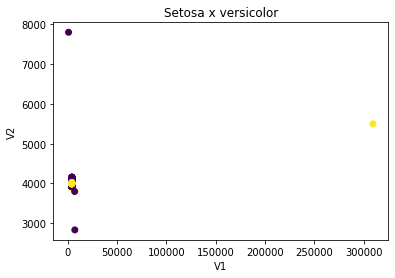

In [229]:
plt.scatter(olhos.V1,olhos.V2,c=olhos.Class)
plt.title("Setosa x versicolor" )
plt.xlabel('V1')
plt.ylabel('V2')

In [0]:
# target são os valores que serão previstos
target = olhos['Class']

In [0]:
# retirar a coluna Class do DataFrame
df = olhos.drop(['Class'],axis=1)

In [159]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14'],
      dtype='object')

In [0]:
# selecionar somente a primeira feature
df = df.V1

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target, 
                                                    test_size=0.25, # 25% será amostra de teste
                                                    random_state=RANDOM_STATE,
                                                    stratify=target)

In [21]:
print('Número de linhas e número de colunas:', X_train.shape)

Número de linhas e número de colunas: (11235,)


In [22]:
print('Número de linhas e número de colunas:', y_train.shape)

Número de linhas e número de colunas: (11235,)


In [57]:
X_train.shape[0]

11235



---
**PERCEPTRON**


In [0]:
class Perceptron(object):

    def __init__(self, taxa_aprendizado, n_features, pesos=None, epocas=5):
      self.taxa_aprendizado = taxa_aprendizado
      if pesos is None:
        self.pesos = np.random.uniform(-1, 1, n_features)
      self.epocas = epocas

    # x_train é um DataFrame com as features do conjunto de dados
    # y_train é um Series com os rótulos (label) do conjunto de dados
    def fit(self, X_train, y_train):

      for e in range(self.epocas):

        print("---------------------------")
        print("Epoca:", e)

        qtde_erros = 0

        n_linhas = X_train.shape[0]
        for n in range(n_linhas):
          
          print("\t---------------------------")
          print("\tAmostra:", n)

          np_x = X_train.iloc[n].values
          np_y = y_train.iloc[n]

          print("\tx_atual:", np_x)
          print("\tpesos:", self.pesos)

          output = np.dot(self.pesos, np_x)
          print("\toutput:", output)

          heaveside = 1 if output >= 0 else 0
          print("\theaveside:", heaveside)

          # houve erro
          if heaveside != np_y:

            qtde_erros += 1
            erro = np_y - heaveside
            print("\terro:", erro)
            
            self.pesos = self.pesos + (self.taxa_aprendizado * erro * np_x)
            print("\tpesos atualizado:", self.pesos)

          else:
            print("\tsem erros")
        if qtde_erros == 0:
          # encerra o looping da epoca
          break

    def predict(self, X_test):

      np_x = X_test.values

      prediction = []
      for x in np_x:
        if self.pesos.dot(x) >= 0:
          prediction.append(1)
        else: 
          prediction.append(0)

      return prediction

In [0]:
perceptron = Perceptron(taxa_aprendizado=0.5, n_features=X_train.shape[1])

In [0]:
perceptron.fit(X_train, y_train)



---



In [0]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)

In [199]:
# perceptron = Perceptron(taxa_aprendizado=0.3, n_features=X_train.shape[1])
clf = Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=1e-3,
           validation_fraction=0.3, verbose=0, warm_start=False)
clf.fit(X_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.3, verbose=0, warm_start=False)

In [197]:
Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [198]:
clf.score(X_traiX_train[:,1]n, y_train)

0.5946595460614152

Text(0, 0.5, 'target')

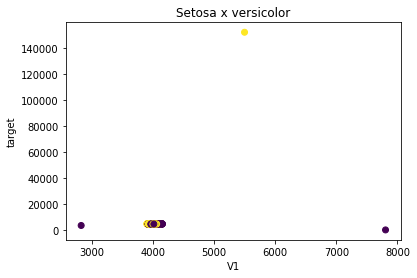

In [226]:
plt.scatter(X_train.V2,X_train.V13,c=y_train)
plt.title("Setosa x versicolor" )
plt.xlabel('V1')
plt.ylabel('target')



---


**CLASSIFICADOR LINEAR**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [192]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
y_pred = regressor.predict(X_train)
y_pred

array([1.46045555, 1.40407741, 1.46132908, ..., 1.48618345, 1.50942696,
       1.22756716])

In [195]:
#####Metricas#####
print(regressor.intercept_)
print(regressor.coef_)

0.7940261708510579
[ 1.92414375e-04 -3.88545755e-03  3.06353538e-03 -1.47098755e-03
  7.70971213e-03 -1.00485905e-02  1.35027855e-03  6.72008523e-04
  6.05453377e-05  1.99255834e-03 -2.34058769e-03  2.06183136e-03
 -5.19175144e-04  1.71438181e-03]


In [170]:
############## Avaliacao do Modelo ##########

print('R2: ',r2_score(y_train, y_pred)) # ERRO
print('MSE: ',mean_squared_error(y_train, y_pred)) # "Desvio quadrado médio" sempre é não negativo, e valores mais próximos de zero são melhores.
print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_pred)))

R2:  0.08948070451782497
MSE:  0.2252407275683307
RMSE:  0.47459533032714374


In [77]:
print (y_train.shape)

(11235,)


In [78]:
print (y_pred.shape)

(11235,)


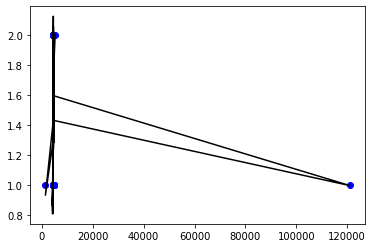

In [190]:
######## Apresentação dos Dados e Modelo ########





---



### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*Indique o método escolhido*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*